# Library's Import


In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

# EDA
1.Uploading CSV file.

2.Info.

3.Rows and Column.

4.Head & tail.

5.Null values.

6.Duplicate values.

7.describe(statistical data)

8.nunique Values all rows

# Uploading the file

In [5]:
data=pd.read_csv(r"C:\Users\user\Documents\student_exam_data.csv")

In [6]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


1.We can see the there are some numerical value in data set.

2.Our target vairable is " Pass/Fail"

In [8]:
print("number of row",data.shape[0])
print("number of columns",data.shape[1])

number of row 500
number of columns 3


In the data set there are 500 Rows(Horizontal),and 3 column(Vertical)

In [9]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


First five Rows & Columns

In [10]:
data.tail()

,Study Hours,Previous Exam Score,Pass/Fail
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1
499,9.875897,66.760346,1


last five Rows & Columns

In [11]:
data.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

Sum of the null value

In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

There are no duplicate values in the data set.

In [13]:
data.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


we calculate statistical data.

In [14]:
data.nunique()

Study Hours            500
Previous Exam Score    500
Pass/Fail                2
dtype: int64

nunique value

In [15]:
data1=data['Pass/Fail'].value_counts()
size=data['Pass/Fail'].value_counts()
print(data1)

Pass/Fail
0    316
1    184
Name: count, dtype: int64


# Visualization

([<matplotlib.patches.Wedge at 0x2898947be90>,
 [Text(-0.44319717128295216, 1.0067652493837824, ''),
  Text(0.4431972655431159, -1.006765207888664, '')],
 [Text(-0.24174391160888298, 0.5491446814820631, '63.2%'),
  Text(0.24174396302351772, -0.5491446588483622, '36.8%')])

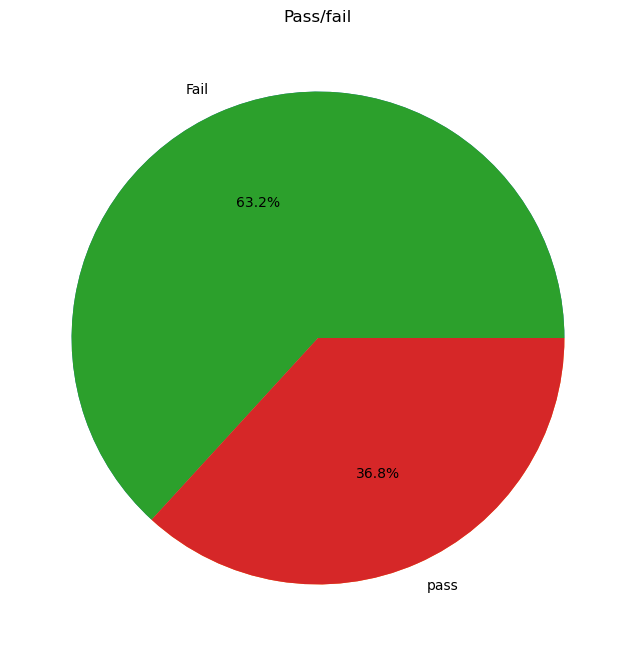

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(data1, labels=["Fail", "pass"])
plt.title("Pass/fail")
plt.pie(size, autopct="%.1f%%")

1.we can see that our target vairable distribution is highly imblanced.

2.Majority of the studenta is fail (63.2%).

3.Only (36.8%) has pass.

<Axes: xlabel='Previous Exam Score', ylabel='Count'>

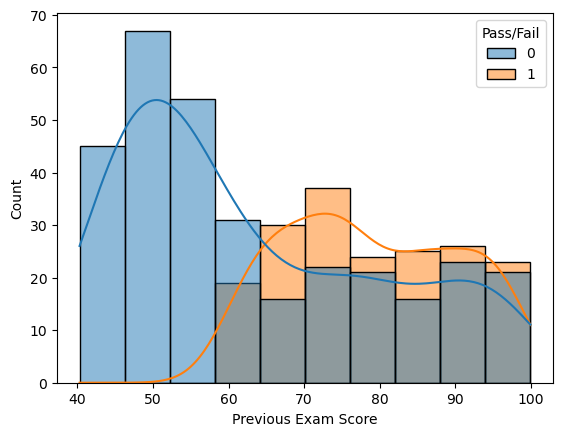

In [17]:
sns.histplot(data=data,x="Previous Exam Score",hue="Pass/Fail",kde=True, bins=10)

Those students are get more than 78.86 score in previous exam have higher chances of pass

In [18]:
data.groupby("Pass/Fail")["Previous Exam Score"].mean()

Pass/Fail
0    63.123158
1    78.867522
Name: Previous Exam Score, dtype: float64

In [19]:
data[data["Previous Exam Score"]>63.123158]

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
3,6.387926,88.827701,1
4,2.404168,81.083870,0
6,1.522753,94.655631,0
...,...,...,...
491,6.581193,81.681788,1
493,2.693090,75.413840,0
496,6.252905,95.038815,1
498,9.769553,97.014241,1


<Axes: xlabel='Study Hours', ylabel='Count'>

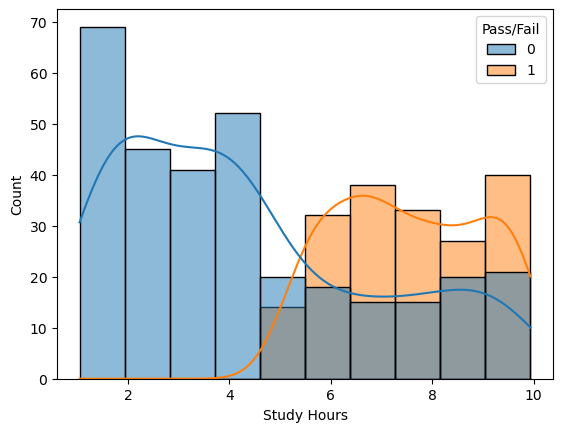

In [20]:
sns.histplot(data=data, x="Study Hours", hue="Pass/Fail", bins=10, kde=True)

Those students are study more than 7.5 hours have higher chances of pass otherwise fail.

In [21]:
data.groupby("Pass/Fail")["Study Hours"].mean()

Pass/Fail
0    4.291317
1    7.540606
Name: Study Hours, dtype: float64

In [22]:
data[data["Study Hours"]>4.291317]

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
7,8.795585,89.352235,1
...,...,...,...
491,6.581193,81.681788,1
494,5.173286,61.658434,1
496,6.252905,95.038815,1
498,9.769553,97.014241,1


<Axes: >

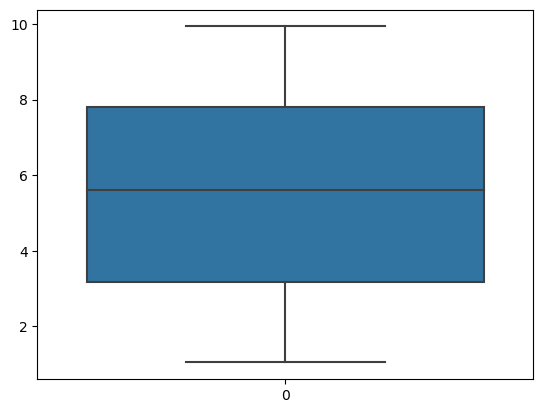

In [23]:
sns.boxplot(data["Study Hours"])

<Axes: >

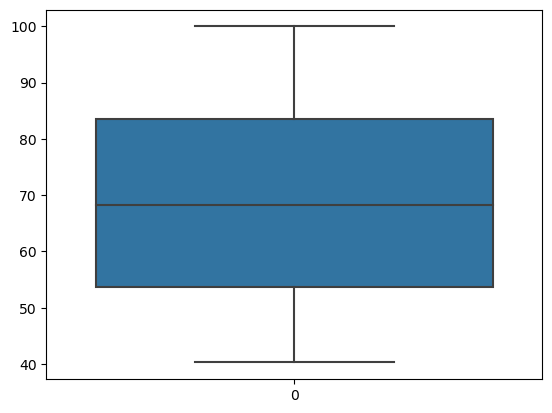

In [24]:
sns.boxplot(data["Previous Exam Score"])

There are no outliear present.

<Axes: >

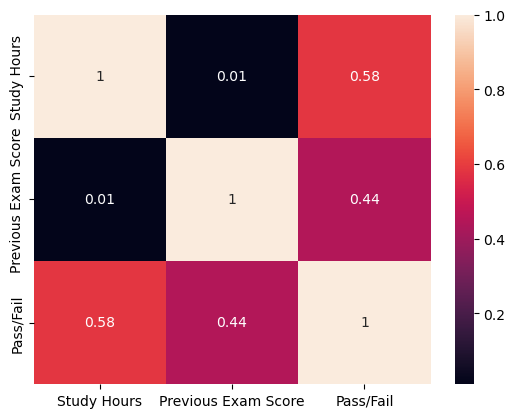

In [25]:
sns.heatmap(data.corr(),annot=True)

# Processing

In [26]:
X=data.drop(columns=["Pass/Fail"],axis=1)
Y=data["Pass/Fail"]

spliting into independent & Dependent Feature

In [27]:
column=["Study Hours","Previous Exam score"]

Now, we create an object for the numeric feature.

In [28]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [29]:
Y_train.value_counts()

Pass/Fail
0    255
1    145
Name: count, dtype: int64

# SMOTE

In [28]:
pip install --upgrade scikit-learn imbalanced-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\ana\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
conda install -c glemaitre imbalanced-learn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\ana

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       haa95532_0         128 KB
    certifi-2024.7.4           |  py311haa95532_0         160 KB
    imbalanced-learn-0.12.3    |  py311haa95532_1         425 KB
    ------------------------------------------------------------
                                           Total:         713 KB

The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2024.7.2-haa95532_0 
  certifi                         2023.7.22-py311haa95532_0 --> 2024.7.4-py311haa95532_0 
  imbalanced-learn                   0.10.1-py311haa95532_1 --> 0.12.3-py311haa95532_1 




imbalanced-learn-0.1 | 425 KB



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




In [8]:
import sklearn
print(sklearn.__version__)


1.5.1


In [12]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=10)
print("SMOTE imported successfully.")


SMOTE imported successfully.


In [31]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
Y_train_os.value_counts()

Pass/Fail
1    255
0    255
Name: count, dtype: int64

# Model Build

1.KNeighborsClassifier

2.Logistic Regression

3.Support Vector Machine (SVM)

# KNeighborsClassifier

In [32]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [33]:
KNN.fit(X_train_os,Y_train_os)

KNeighborsClassifier()

In [34]:
KNN_pred = KNN.predict(X_test)
KNN_cm= confusion_matrix(Y_test,KNN_pred)
KNN_acc= accuracy_score(Y_test,KNN_pred)*100
KNN_prec=precision_score(Y_test,KNN_pred)*100
KNN_rec=recall_score(Y_test,KNN_pred)*100
KNN_f1=f1_score(Y_test,KNN_pred)*100
print("accuracy_score: ", KNN_acc)
print("precision_score: ", KNN_prec)
print("recall_score: ", KNN_rec)
print("f1_score: ", KNN_f1)
print("confusion_matrix: \n", KNN_cm)

accuracy_score:  98.0
precision_score:  97.43589743589743
recall_score:  97.43589743589743
f1_score:  97.43589743589743
confusion_matrix: 
 [[60  1]
 [ 1 38]]


In [35]:
print(classification_report(Y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        39

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# Logistic Regression

In [37]:
log=LogisticRegression()

In [38]:
log.fit(X_train_os,Y_train_os)

LogisticRegression()

In [39]:
log_pred = log.predict(X_test)
log_cm= confusion_matrix(Y_test,log_pred)
log_acc= accuracy_score(Y_test,log_pred)*100
log_prec=precision_score(Y_test,log_pred)*100
log_rec=recall_score(Y_test,log_pred)*100
log_f1=f1_score(Y_test,log_pred)*100
print("accuracy_score: ", log_acc)
print("precision_score: ", log_prec)
print("recall_score: ", log_rec)
print("f1_score: ", log_f1)
print("confusion_matrix: \n", log_cm)

accuracy_score:  87.0
precision_score:  78.26086956521739
recall_score:  92.3076923076923
f1_score:  84.70588235294117
confusion_matrix: 
 [[51 10]
 [ 3 36]]


In [40]:
print(classification_report(Y_test,log_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.78      0.92      0.85        39

    accuracy                           0.87       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



# Support Vector Machine (SVM)

In [41]:
svm=SVC()

In [42]:
svm.fit(X_train_os, Y_train_os)

SVC()

In [43]:
svm_pred = svm.predict(X_test)
svm_cm= confusion_matrix(Y_test,svm_pred)
svm_acc= accuracy_score(Y_test,svm_pred)*100
svm_prec=precision_score(Y_test,svm_pred)*100
svm_rec=recall_score(Y_test,svm_pred)*100
svm_f1=f1_score(Y_test,svm_pred)*100
print("accuracy_score: ", svm_acc)
print("precision_score: ", svm_prec)
print("recall_score: ", svm_rec)
print("f1_score: ", svm_f1)
print("confusion_matrix: \n", svm_cm)

accuracy_score:  92.0
precision_score:  84.44444444444444
recall_score:  97.43589743589743
f1_score:  90.47619047619048
confusion_matrix: 
 [[54  7]
 [ 1 38]]


In [44]:
print(classification_report(Y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



In [45]:
final_data = pd.DataFrame({"MODEL": ["KNeighborsClassifier", "LogisticRegression", "SVM"],
                           "Accuracy": [accuracy_score(Y_test,KNN_pred)*100,
                                        accuracy_score(Y_test,log_pred)*100,
                                        accuracy_score(Y_test,svm_pred)*100],
                           "Precision": [precision_score(Y_test, KNN_pred)*100,
                                         precision_score(Y_test, log_pred)*100,
                                         precision_score(Y_test,svm_pred)*100],
                           "Recall": [recall_score(Y_test, KNN_pred)*100,
                                      recall_score(Y_test, log_pred)*100,
                                      recall_score(Y_test,svm_pred)*100],
                           "f1-score": [f1_score(Y_test, KNN_pred)*100,
                                        f1_score(Y_test, log_pred)*100,
                                        f1_score(Y_test,svm_pred)*100]})

In [46]:
final_data

,MODEL,Accuracy,Precision,Recall,f1-score
0,KNeighborsClassifier,98.0,97.435897,97.435897,97.435897
1,LogisticRegression,87.0,78.260870,92.307692,84.705882
2,SVM,92.0,84.444444,97.435897,90.476190


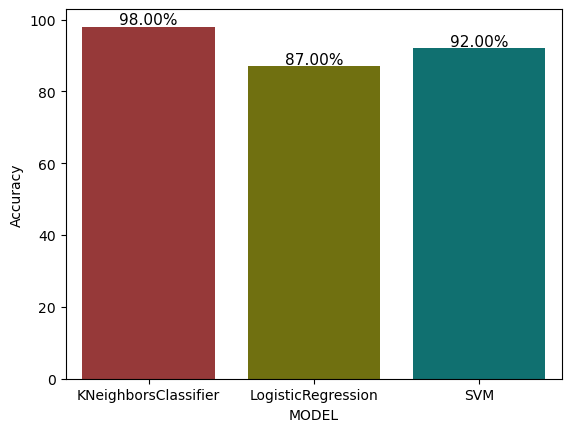

In [47]:
custom_palette = ["brown", "olive", "teal"]
barplot = sns.barplot(x="MODEL", y="Accuracy", data=final_data, palette=custom_palette)
for p in barplot.patches:
    barplot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')